# Module 37 Topic Review: Time Series Modeling

In [24]:
# Import all packages and functions
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

## Basic Time Series Models

### White Noise

A white noise model is the best example of a truly stationary process.  

The white noise model has three properties:
- Fixed and constant mean  
- Fixed and constant variance  
- No correlation over time  

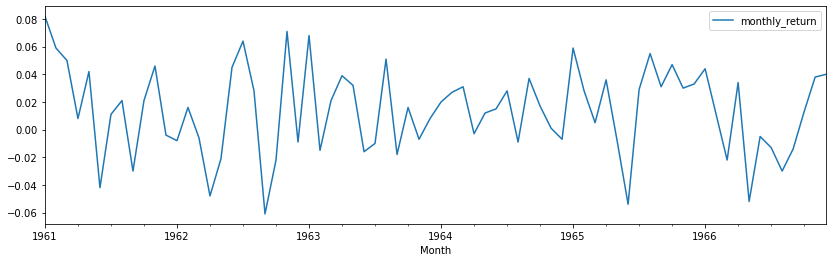

In [1]:
nyse = pd.read_csv('../basic-time-series-models/NYSE_monthly.csv')
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)

nyse.plot(figsize = (14,4))
plt.show();

### Random Walk  

Conversely a random walk model has  
- No specified mean or variance  
- A stronge dependence over time

The changes over time are basically a white noise model. Mathematically, this can be written as:

$$\large Y_t = Y_{t-1} + \epsilon_t$$

Where $\epsilon_t$ is a *mean zero* white noise model!  

A typical example is exchange rates. Generally speaking, tomorrow's currency exchange rate will be strongly influenced by today's exchange rate, with a small increase or decrease.

In [8]:
# Keep the random seed
np.random.seed(11)

# Create a series with the specified dates
dates = pd.date_range('2010-01-01', '2010-11-30', freq='B')

# White noise error term
error = np.random.normal(0, 10, len(dates))

# Define random walk
def random_walk(start, error):        
    Y_0 = start
    cum_error = np.cumsum(error)
    Y = cum_error + Y_0 
    return Y

shares_value = random_walk(1000, error)

shares_series = pd.Series(shares_value, index=dates)

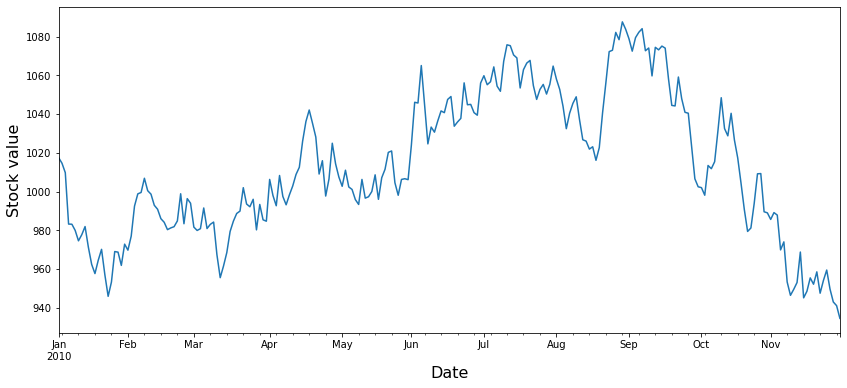

In [9]:
# Your code here
ax = shares_series.plot(figsize=(14,6))
ax.set_ylabel('Stock value', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.show()

### Random Walk with a Drift  
An extension of the random walk model is a so-called "random walk with a drift", specified as follows:

$$\large Y_t = c + Y_{t-1} + \epsilon_t$$

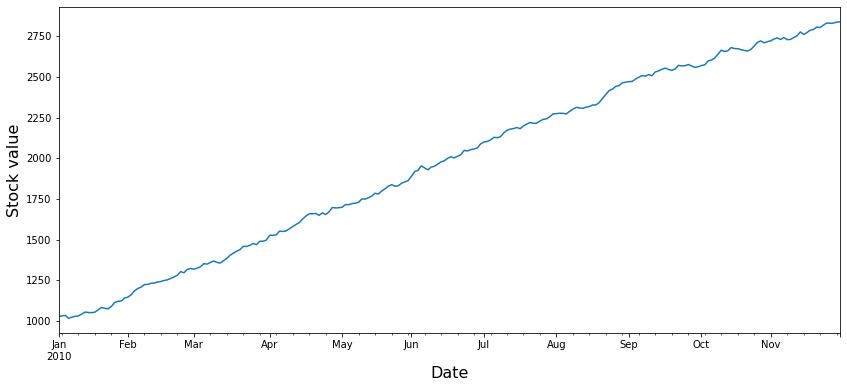

In [10]:
# Keep the random seed
np.random.seed(11)

# Create a series with the specified dates
dates = pd.date_range('2010-01-01', '2010-11-30', freq='B')

# White noise error term
error = np.random.normal(0, 10, len(dates))

# Define random walk
def random_walk(start, error):        
    Y_0 = start
    cum_error = np.cumsum(error + 8)
    Y = cum_error + Y_0 
    return Y

shares_value_drift = random_walk(1000, error)

shares_series_drift =  pd.Series(shares_value_drift, index=dates)

ax = shares_series_drift.plot(figsize=(14,6))
ax.set_ylabel('Stock value', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.show()

##### Differencing a Random Walk  
One important property of the random walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

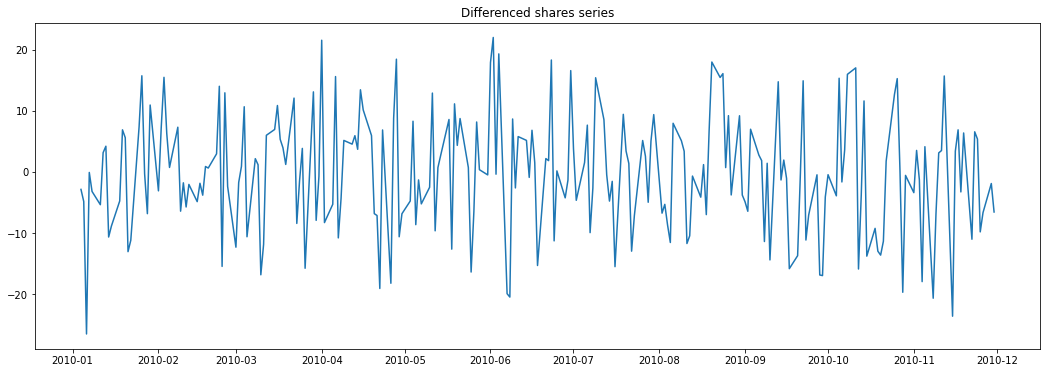

In [11]:
# Your code here
shares_diff = shares_series.diff(periods=1)

fig = plt.figure(figsize=(18,6))
plt.plot(shares_diff)
plt.title('Differenced shares series')
plt.show(block=False)

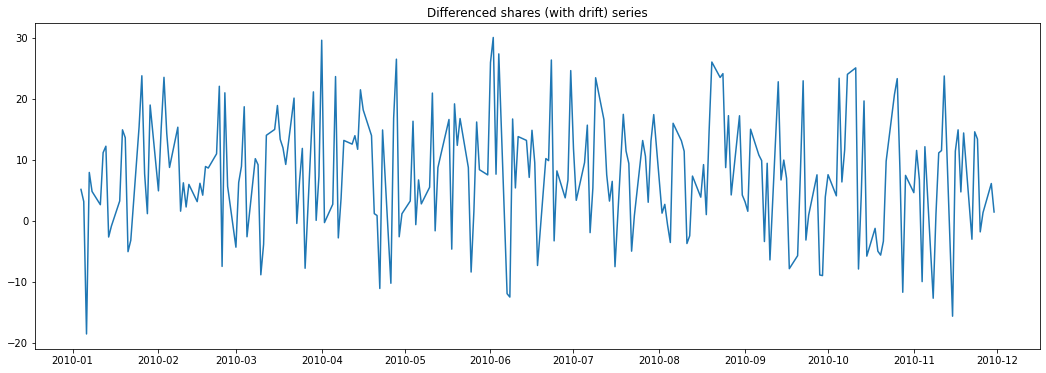

In [12]:
# Your code here 
shares_drift_diff = shares_series_drift.diff(periods=1)

fig = plt.figure(figsize=(18,6))
plt.plot(shares_drift_diff)
plt.title('Differenced shares (with drift) series')
plt.show(block=False)

## Time Series Correlations

### Correlation  

Like other data types and distributions, the Pearson correlation coefficient can be used to summarize the correlation between the features in a time series.  

In [13]:
# Import data
xr = pd.read_csv('../basic-time-series-models/exch_rates.csv')

# Change the data type of the 'Frequency' column 
xr['Frequency'] = pd.to_datetime(xr['Frequency'])

# Set the 'Frequency' column as the index
xr.set_index('Frequency',inplace=True)

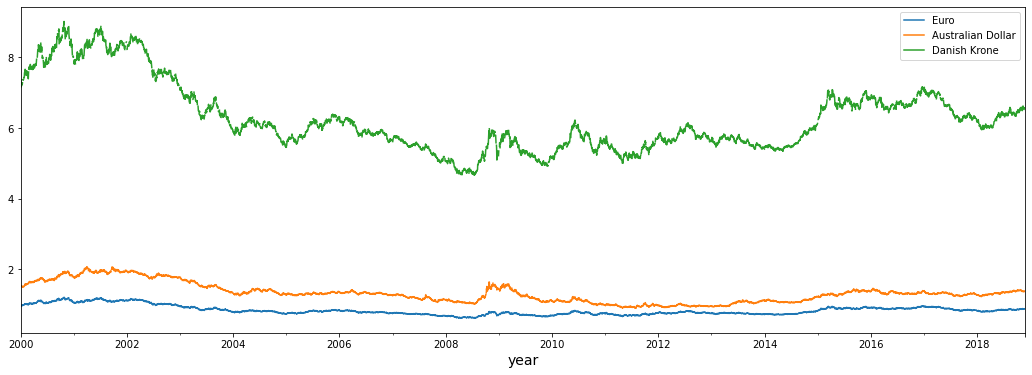

In [14]:
xr.plot(figsize=(18,6));
plt.xlabel('year',fontsize=14);

In [15]:
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


#### Impact of differencing on correlations
True correlations may become more obvious by differencing the series (because it makes the series more stationary). 

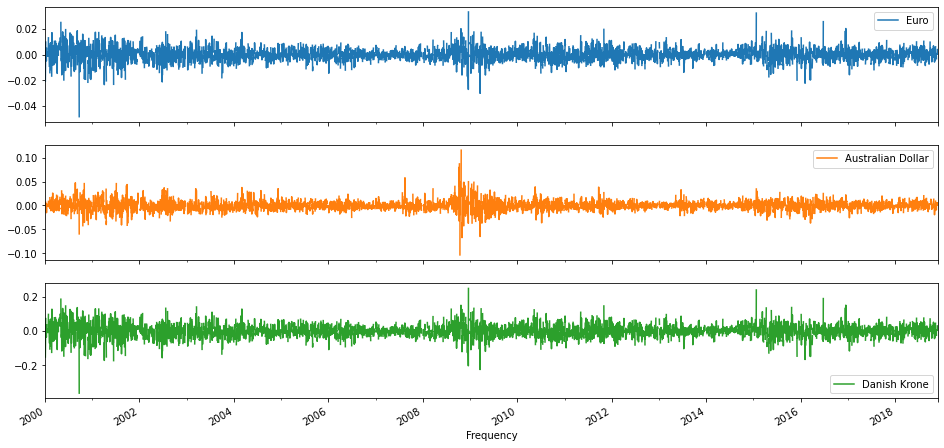

In [46]:
xr_diff = xr.diff(periods=1)
xr_diff.plot(figsize=(16,8), subplots=True, legend=True);

In [17]:
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


Differencing the series here led to a decrease in correlation between the EUR/USD and AUD/USD series.

### Autocorrelation  
Autocorrelation is a very powerful tool for time series analysis. It helps us study how each time series observation is related to its recent (or not so recent) past. Processes with greater autocorrelation are more predictable than those without any form of autocorrelation.

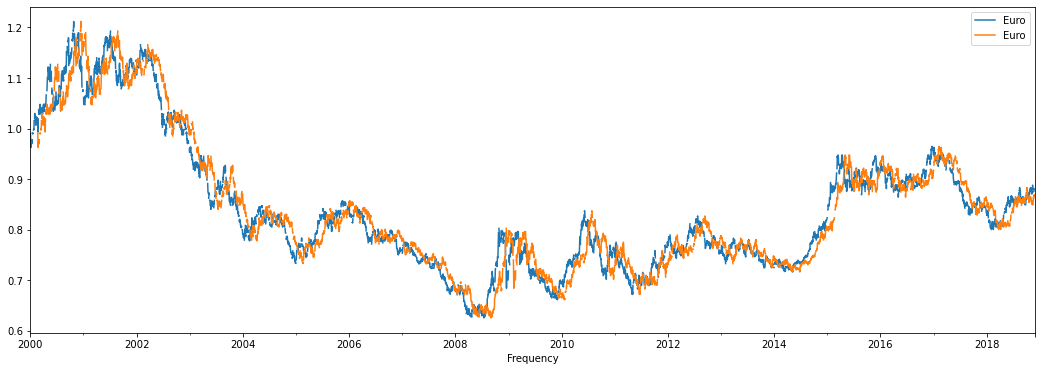

In [21]:
# Isolate the EUR/USD exchange rate
eur = xr[['Euro']]

# "Shift" the time series by 50 periods
eur_shift_50 = eur.shift(periods=50)

# Combine the original and shifted time series
lag_50 = pd.concat([eur,eur_shift_50],axis=1)

# Plot
lag_50.plot(figsize=(18,6));

In [19]:
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


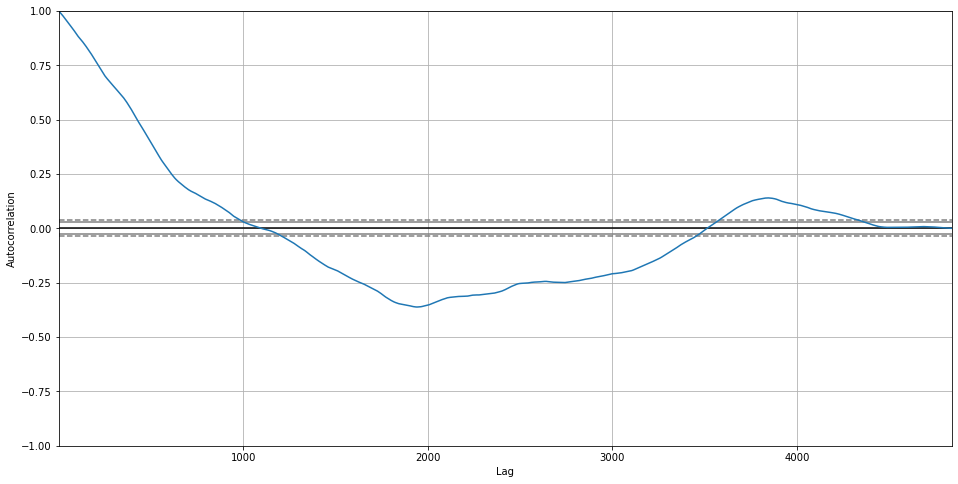

In [44]:
# Plot ACF
plt.figure(figsize=(16,8))
pd.plotting.autocorrelation_plot(eur.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

### Partial Autocorrelation  
Similar to the autocorrelation function, the Partial Autocorrelation Function (or PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. PACF can be thought of as a summary of the relationship between a time series element with observations at a lag, with the relationships of intervening observations removed.

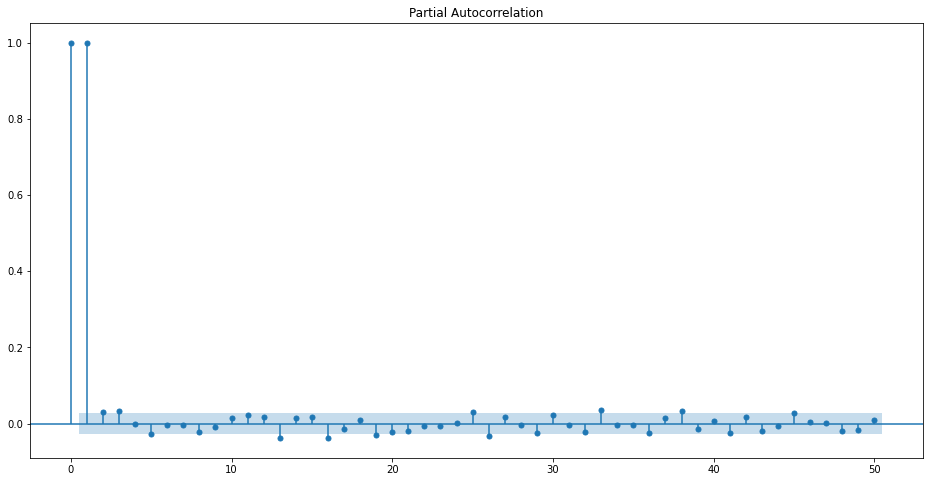

In [45]:
# Plot PACF
rcParams['figure.figsize'] = 16, 8
plot_pacf(eur.dropna(), lags=50);

## ARMA Models

In [28]:
arma = pd.read_csv('../arma-models-statsmodels/winning_400m.csv')
arma['year'] = pd.to_datetime(arma['year'].astype(str))
arma.set_index('year', inplace=True)
arma.index = arma.index.to_period("Y")
arma.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


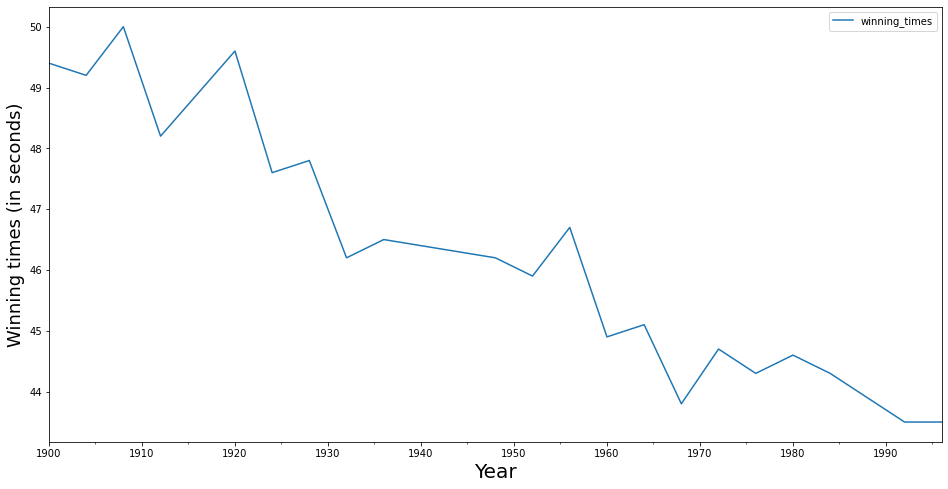

In [29]:
# Plot the time series
arma.plot(figsize=(16,8));
plt.xlabel('Year', fontsize=20)
plt.ylabel('Winning times (in seconds)', fontsize=18);

In [32]:
arma_diff = arma.diff().dropna()
arma_diff.head()

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0


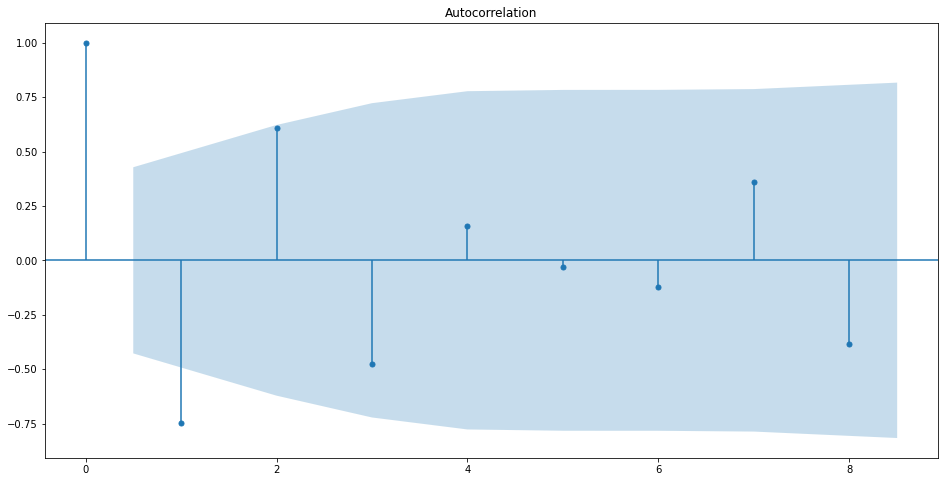

In [42]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(arma_diff,ax=ax, lags=8);

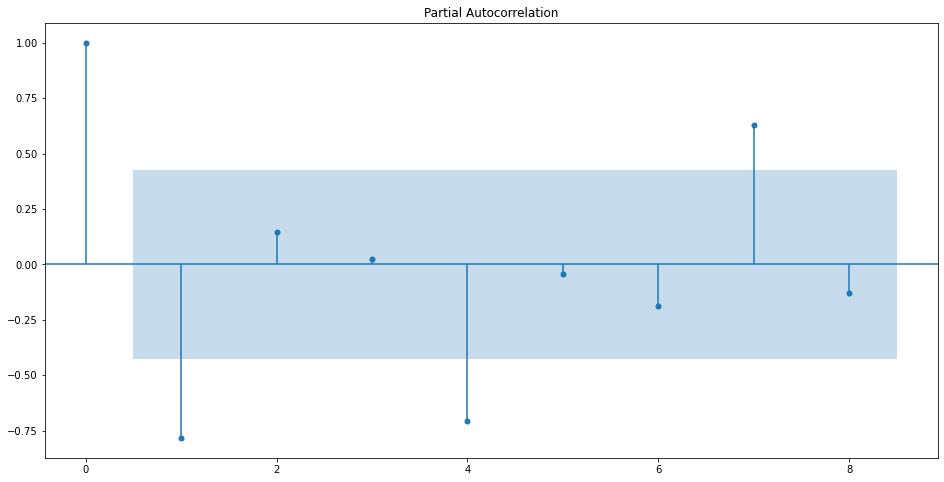

In [43]:
fig, ax = plt.subplots(figsize=(16,8))
plot_pacf(arma_diff,ax=ax, lags=8);

### Auto Regressive (AR)  
An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.  

Mathematically this is: 

- Today = Constant + slope X yesterday + noise  
  
- $Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$

Some important thigns to note:

- If the slope is 0, the time series is a white noise model with mean  
- If the slope is not 0, the time series is autocorrelated - Bigger slope means bigger autocorrelation  
- When there is a negative slope, the time series follows an oscillatory process

### Moving Average (MA)  
The Moving Average model can be described as the weighted sum of today's and yesterday's noise.

In words, the mathematical idea is the following:
- Today = Mean + Noice + Slope X yesterday's noise  
- $Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$


In [39]:
# Import ARMA
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARMA

# Fit an ARMA(1,0) model
mod_arma = ARMA(arma_diff, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Wed, 03 Aug 2022   AIC                             46.107
Time:                        15:12:25   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

In [40]:
# Fit an ARMA(2,1) model
mod_arma = ARMA(arma_diff, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Wed, 03 Aug 2022   AIC                             47.911
Time:                        15:15:09   BIC                             53.133
Sample:                    12-31-1904   HQIC                            49.044
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.000      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.winning_ti

In [41]:
# Fit an ARMA(2,2) model
mod_arma = ARMA(arma_diff, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Wed, 03 Aug 2022   AIC                             44.943
Time:                        15:15:15   BIC                             51.210
Sample:                    12-31-1904   HQIC                            46.303
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.005      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.070      0.000      -1.948      -1.567
ar.L2.winning_ti

## Recap

- A white noise model has a fixed and constant mean and variance, and no correlation over time  

- A random walk model has no specified mean or variance, but has a strong dependence over time  

- Autocorrelation allows us to identify how strongly each time series observation is related to previous observations  

- The Autocorrelation Function (ACF) is a function that represents autocorrelation of a time series as a function of the time lag  

- The Partial Autocorrelation Function (or PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags  

- ARMA (Autoregressive and Moving Average) modeling is a tool for forecasting time series values by regressing the variable on its own lagged (past) values  

- ARMA models assume that you've already detrended your data and that there is no seasonality  